# Basic measurement data pre-processing

In [1]:
%matplotlib inline

In [2]:
from meas_data_preprocessing import *

## Read data for a selected measurement scenario

In [3]:
infos, measurement_data = read_data(meas_scenario=13)

Checking if file ../datasets/pD7_MH44.DAT is already present or download it from https://raw.githubusercontent.com/Ma-Weber/Tutorial-Deconvolution/master/MeasuredSignals/pD-Mode%207%20MHz/pD7_MH44.DAT otherwise:

file_sizes: 100%|███████████████████████████| 30.5k/30.5k [00:00<00:00, 671kB/s]
Successfully downloaded file to ../datasets/pD7_MH44.DAT
Checking if file ../datasets/pD7_MH44r.DAT is already present or download it from https://raw.githubusercontent.com/Ma-Weber/Tutorial-Deconvolution/master/MeasuredSignals/pD-Mode%207%20MHz/pD7_MH44r.DAT otherwise:

file_sizes: 100%|███████████████████████████| 32.7k/32.7k [00:00<00:00, 637kB/s]
Successfully downloaded file to ../datasets/pD7_MH44r.DAT
Checking if file ../datasets/MW_MH44ReIm.csv is already present or download it from https://raw.githubusercontent.com/Ma-Weber/Tutorial-Deconvolution/master/HydrophoneCalibrationData/MW_MH44ReIm.csv otherwise:

file_sizes: 100%|████████████████████████████| 171k/171k [00:00<00:00, 1.31MB/s]
Suc

In [4]:
# metadata for chosen measurement scenario
for key in infos.keys():
    print("%20s: %s" % (key, infos[key]))

                   i: 13
       hydrophonname: GAMPT MH44
     measurementtype: Pulse-Doppler-Mode 7 MHz
     measurementfile: ../datasets/pD7_MH44.DAT
           noisefile: ../datasets/pD7_MH44r.DAT
         hydfilename: ../datasets/MW_MH44ReIm.csv


In [5]:
# available measurement data
for key in measurement_data.keys():
    print("%10s: %s" % (key, type(measurement_data[key])))

      name: <class 'str'>
   voltage: <class 'numpy.ndarray'>
      time: <class 'numpy.ndarray'>


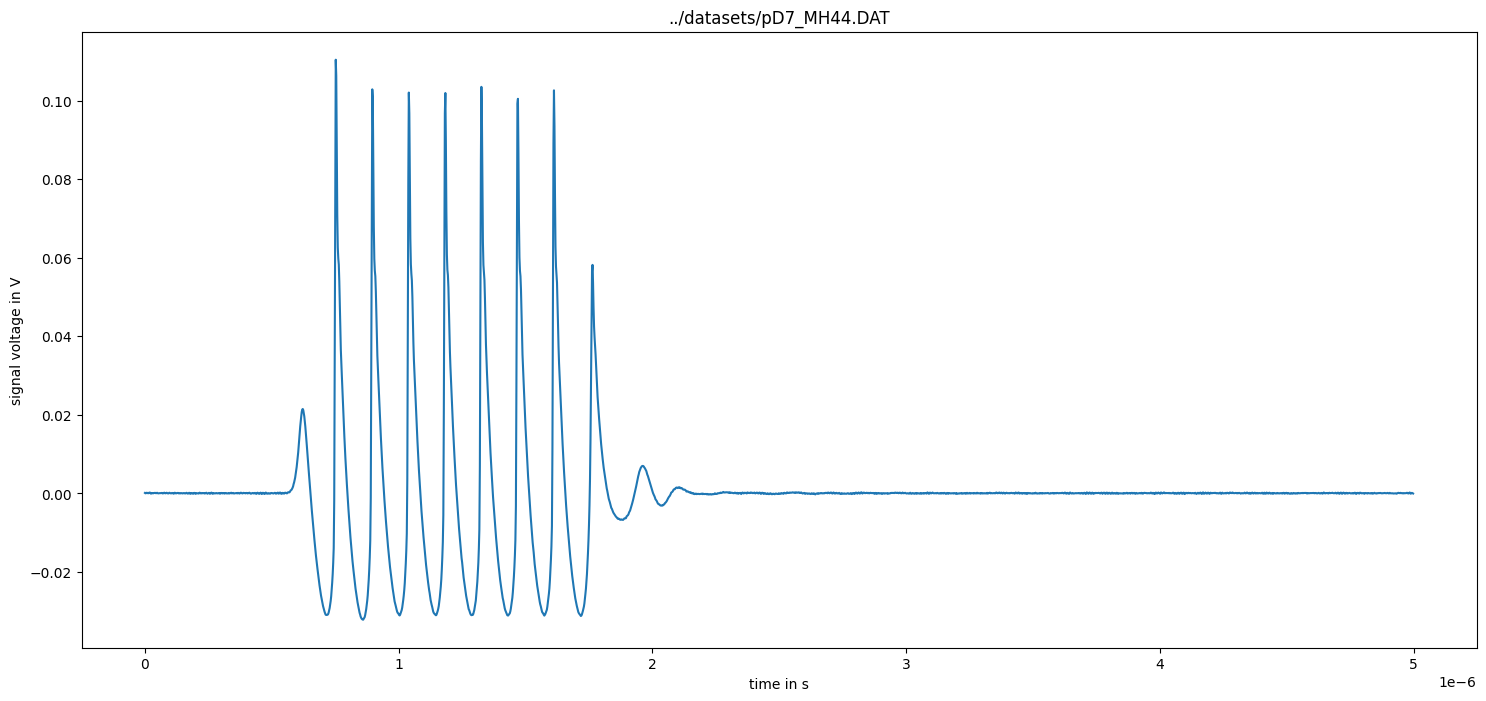

In [6]:
figure(figsize=(18, 8))
plot(measurement_data["time"], measurement_data["voltage"])
xlabel("time in s")
ylabel("signal voltage in V")
title(measurement_data["name"])
show()

## Remove DC component

In [7]:
measurement_data = remove_DC_component(measurement_data)

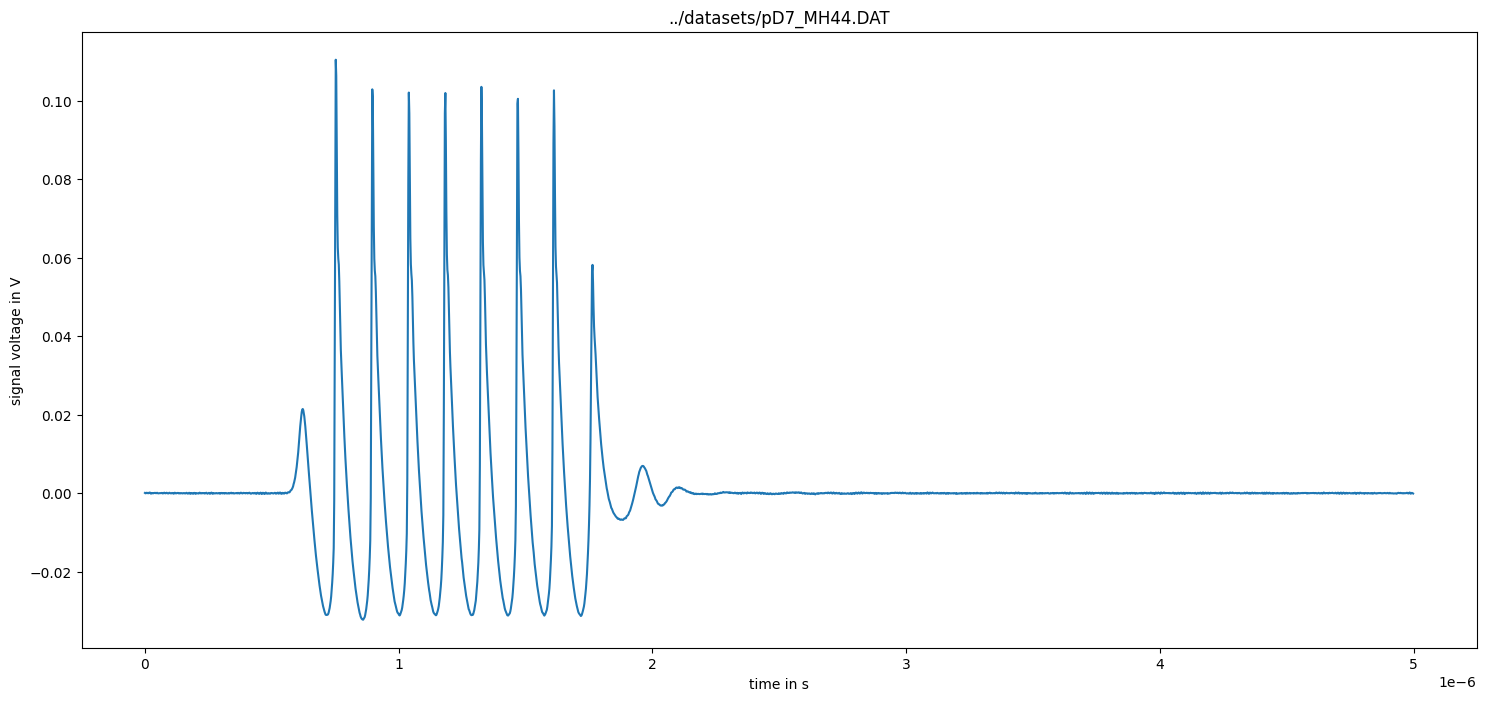

In [8]:
figure(figsize=(18, 8))
plot(measurement_data["time"], measurement_data["voltage"])
xlabel("time in s")
ylabel("signal voltage in V")
title(measurement_data["name"])
show()

## Calculate measurement uncertainty from noise data

In [9]:
measurement_data = uncertainty_from_noisefile(infos, measurement_data, do_plot=False)

The file "../datasets/pD7_MH44r.DAT" was read and it contains 2500 data points


In [10]:
# available measurement data
for key in measurement_data.keys():
    print("%12s: %s" % (key, type(measurement_data[key])))

        name: <class 'str'>
     voltage: <class 'numpy.ndarray'>
        time: <class 'numpy.ndarray'>
 uncertainty: <class 'numpy.ndarray'>


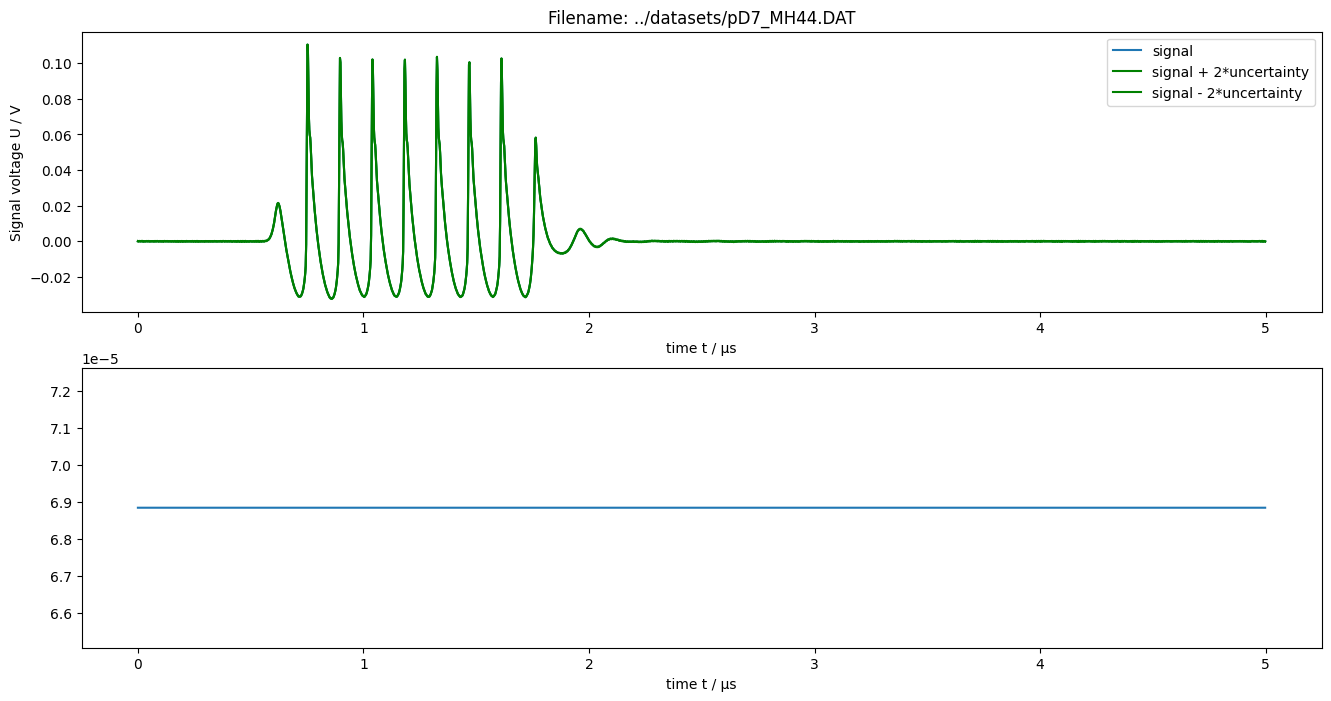

In [11]:
figure(figsize=(16, 8))
subplot(211)
plot(measurement_data["time"] / 1e-6, measurement_data["voltage"])
plot(
    measurement_data["time"] / 1e-6,
    measurement_data["voltage"] + 2 * measurement_data["uncertainty"],
    "g",
)
plot(
    measurement_data["time"] / 1e-6,
    measurement_data["voltage"] - 2 * measurement_data["uncertainty"],
    "g",
)
legend(["signal", "signal + 2*uncertainty", "signal - 2*uncertainty"])
xlabel("time t / µs")
ylabel("Signal voltage U / V")
title("Filename: {}".format(measurement_data["name"]))

subplot(212)
plot(measurement_data["time"] / 1e-6, measurement_data["uncertainty"])
xlabel("time t / µs")
show()

## Calculate spectrum of measured data

In [12]:
measurement_data = calculate_spectrum(measurement_data, do_plot=False)

In [13]:
# available measurement data
for key in measurement_data.keys():
    print("%12s: %s" % (key, type(measurement_data[key])))

        name: <class 'str'>
     voltage: <class 'numpy.ndarray'>
        time: <class 'numpy.ndarray'>
 uncertainty: <class 'numpy.ndarray'>
   frequency: <class 'numpy.ndarray'>
    spectrum: <class 'numpy.ndarray'>
     varspec: <class 'numpy.ndarray'>


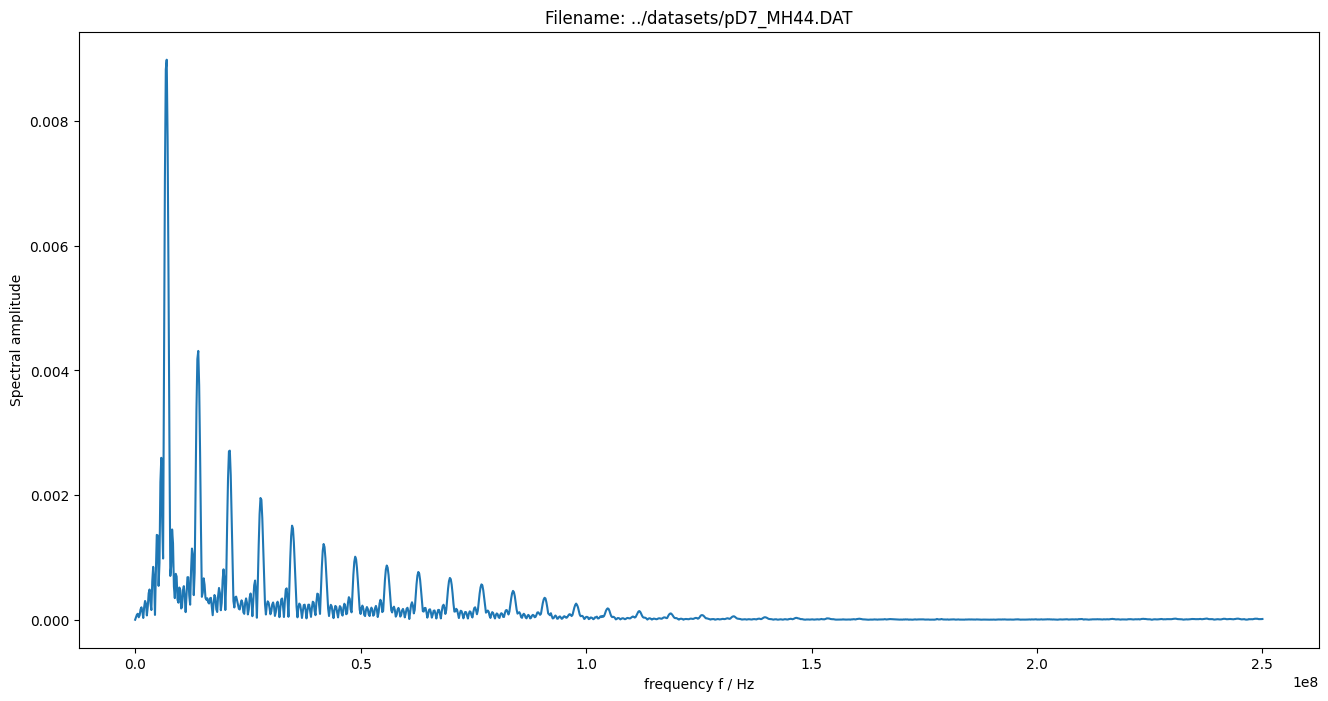

In [14]:
figure(figsize=(16, 8))
plot(realpart(measurement_data["frequency"]), amplitude(measurement_data["spectrum"]))
xlabel("frequency f / Hz")
ylabel("Spectral amplitude")
title("Filename: {}".format(measurement_data["name"]))
show()